## Web Analytics DATA 620 - Project 01

## Assignment: Data Sets

### Group Members: Coffy Andrews-Guo & Tora Mullings

### Submission Date: June 18th, 2023

[GitHub Source Code](https://github.com/candrewxs/D620/tree/main/Assignment%20Data%20Sets)


# Davis Club

Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


In [1]:
%matplotlib inline

In [57]:
# disable warnings
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [58]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))


Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [3]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [4]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


In [5]:
fw_graph = bipartite.weighted_projected_graph(G, women, True)

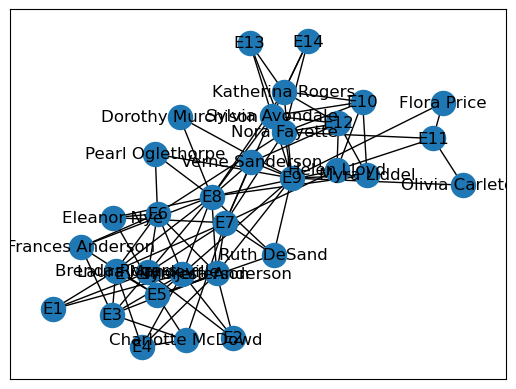

<Figure size 640x480 with 0 Axes>

In [6]:
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw_networkx(G, pos)
plt.show()

What is meant that the graph is bipartite (clubs, women)? This suggests the graph has two (bi) node partitions (partite) where we can assign nodes to one of the two partitions (clubs, women). Here, the node sets are **clubs** nodes and **women** nodes, and edges indicate that clubs membership are inter-connected between the women.

### Basic Topological Attributes - Distribution of Paths 

Importing other necessary libraries

In [59]:
import numpy as np
import pandas as pd
import nxviz as nv

In [8]:
# number of nodes and edges in network
print(G)

Graph with 32 nodes and 89 edges


In [9]:
# average degree of a node
np.mean([d for _, d in G.degree()])

5.5625

The average node is connected to almost **6** other nodes, also known as neighbors of the node.

In [10]:
# check that the graph is indeed a bipartite graph
bipartite.is_bipartite(G)

True

#### Visualize the Davis Club dataset

In [11]:
for n, d in G.nodes(data = True):
    G.nodes[n]["degree"] = G.degree(n)    

<Axes: >

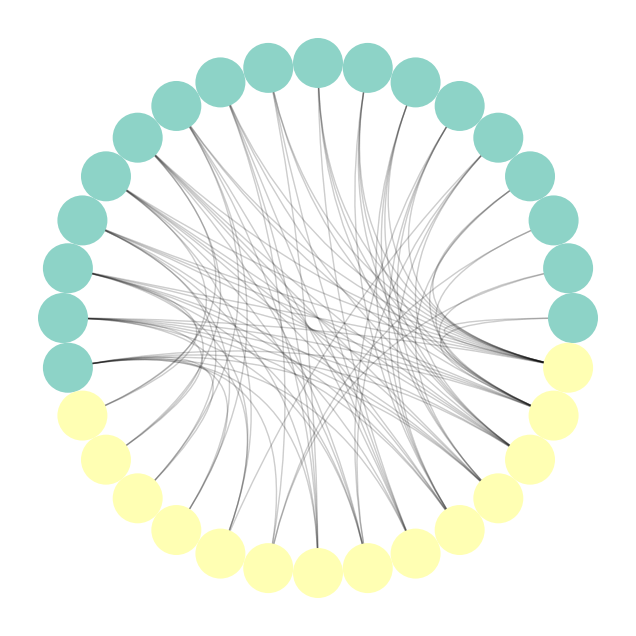

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
nv.circos(G, sort_by = "degree", group_by = "bipartite", node_color_by = "bipartite", node_enc_kwargs={"size_scale": 1})

<function matplotlib.pyplot.show(close=None, block=None)>

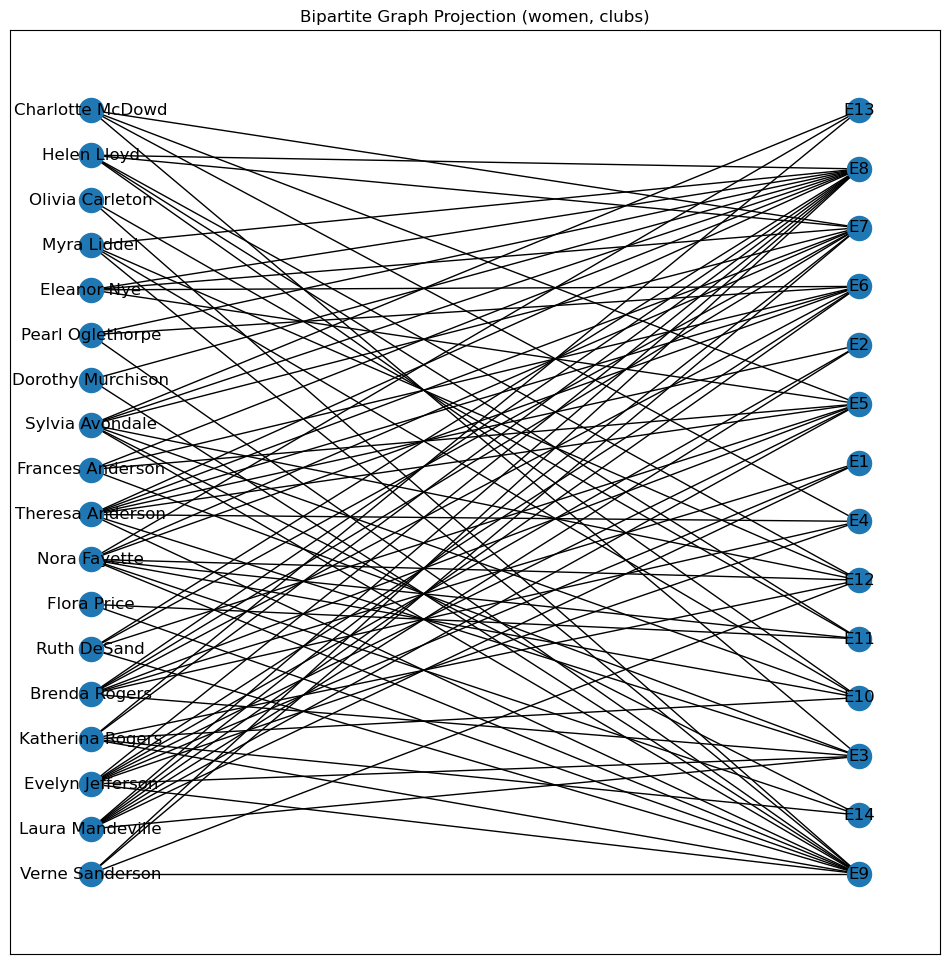

In [13]:
# create bipartite graph
plt.figure(figsize=(12,12))
nx.draw_networkx(G, with_labels=True, pos=nx.bipartite_layout(G, G.graph["top"]) )
plt.title('Bipartite Graph Projection (women, clubs)')
plt.show

In the figure above, the bipartite graph has two node sets, the "women" set and the "clubs" set. The bipartite graph shows the edges connection between the "women" nodes and the "clubs" nodes. 

## Exploring Relationships in the Network 

We will use the extracted nodes from each partitions: *W* - women, and *C* - clubs

### Women Relationship - Degree Centrality Measure

We will use the degree centrality measure that assigns an importance score based on the number of links held by each node. 

In [14]:
degree_centrality_women = nx.centrality.degree_centrality(W)
# save results in a variable to use again
(sorted(degree_centrality_women.items(), key=lambda item: item[1], reverse = True))

[('Evelyn Jefferson', 1.0),
 ('Theresa Anderson', 1.0),
 ('Ruth DeSand', 1.0),
 ('Verne Sanderson', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Nora Fayette', 1.0),
 ('Helen Lloyd', 1.0),
 ('Pearl Oglethorpe', 0.9411764705882353),
 ('Myra Liddel', 0.9411764705882353),
 ('Katherina Rogers', 0.9411764705882353),
 ('Dorothy Murchison', 0.9411764705882353),
 ('Laura Mandeville', 0.8823529411764706),
 ('Brenda Rogers', 0.8823529411764706),
 ('Frances Anderson', 0.8823529411764706),
 ('Eleanor Nye', 0.8823529411764706),
 ('Olivia Carleton', 0.7058823529411764),
 ('Flora Price', 0.7058823529411764),
 ('Charlotte McDowd', 0.6470588235294118)]

The nodes with the highest degree centralities between members has a value of *1.0*. Meaning that these members are friends with *100%* of the whole network. Whereas, *node: Charlotte McDowd*, degree centrality measure indicates a network relationship among members is around *0.6470 (65%)*.

In [15]:
# see the number of neighbors for the nodes with the highest degree centralities:
(sorted(W.degree, key = lambda item: item[1], reverse = True))

[('Evelyn Jefferson', 17),
 ('Theresa Anderson', 17),
 ('Ruth DeSand', 17),
 ('Verne Sanderson', 17),
 ('Sylvia Avondale', 17),
 ('Nora Fayette', 17),
 ('Helen Lloyd', 17),
 ('Pearl Oglethorpe', 16),
 ('Myra Liddel', 16),
 ('Katherina Rogers', 16),
 ('Dorothy Murchison', 16),
 ('Laura Mandeville', 15),
 ('Brenda Rogers', 15),
 ('Frances Anderson', 15),
 ('Eleanor Nye', 15),
 ('Olivia Carleton', 12),
 ('Flora Price', 12),
 ('Charlotte McDowd', 11)]

The nodes with highest number of friends in this network is *17*, and the least popular node has around *11* friends.

Text(0, 0.5, 'Counts')

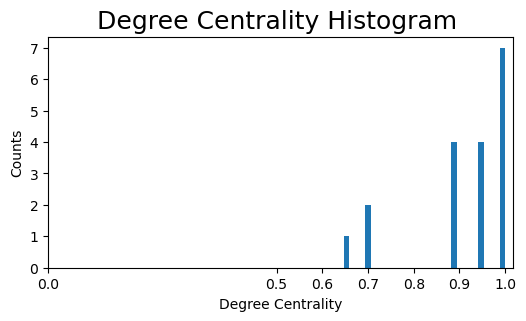

In [16]:
# plot
plt.figure(figsize = (6, 3))
plt.hist(degree_centrality_women.values(), bins = 30)
plt.xticks(ticks = [0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]) # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict = {"size": 18}, loc = "center")
plt.xlabel("Degree Centrality", fontdict = {"size": 10})
plt.ylabel("Counts", fontdict = {"size": 10})

The majority of members have a degree centralities greater than **0.08** indicating that members in this network is highly connected.  

We will check the members with highest degree centralities from the size of their nodes:

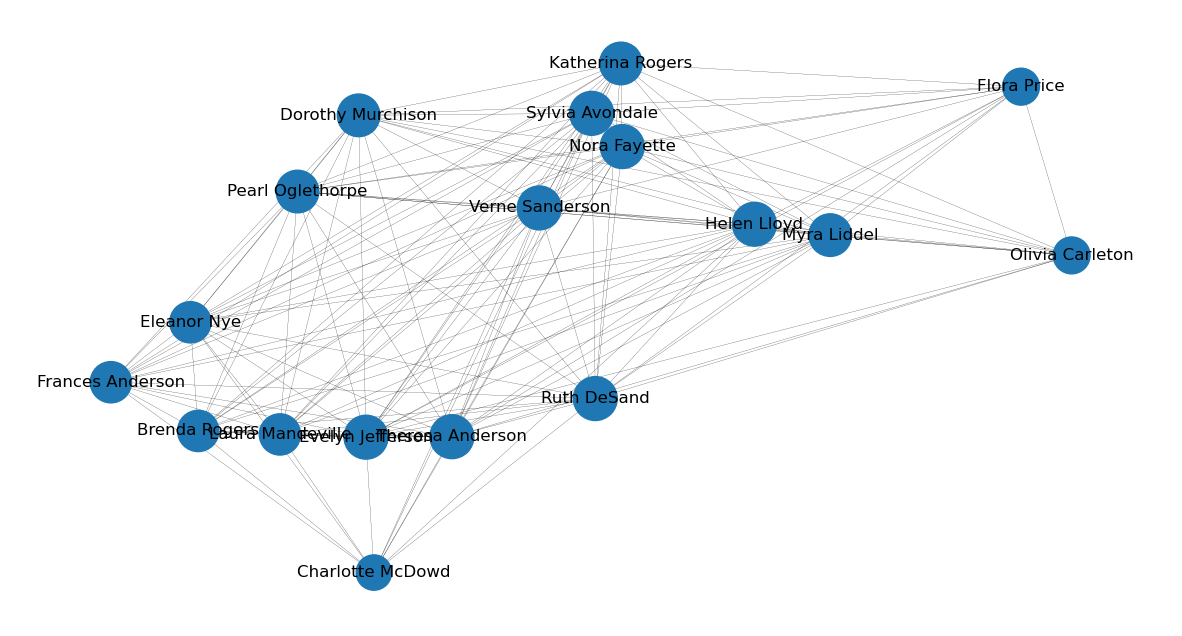

In [26]:
node_size = [
    v * 1000 for v in degree_centrality_women.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(W, pos=pos, node_size=node_size, with_labels=True, width=0.15)
plt.axis("off")

The graph do not clearly show the members with the highest degree centralitites from the size of their nodes, therefore the following **Gephi** graph provides a clearer demonstration.  

In [ ]:
# saving the networkx graph in gexf format
nx.write_gexf(W, 'C:/Users/andre/davis2.gexf')

In [51]:
from IPython.display import Image

In [33]:
# Gephi Graph Layout

Image(url = "https://raw.githubusercontent.com/candrewxs/D620/main/Assignment%20Data%20Sets/DavisWsvg.svg", width = 600)

### Social Events - Eigenvector Centrality Measure

Eigenvector centrality is the metric to show how connected a node is to other important nodes in the network.

Now, we will examine the *events* nodes to identify the most influential club in the network.

In [18]:
C = bipartite.projected_graph(G, clubs)
print()
print("#Event, Clubs")
for c in clubs:
    print(f"{C.degree(c)} {c}")


#Event, Clubs
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14


In [19]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(C)  
# save results in a variable to use again
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))

[('E6', 0.3393355092231299),
 ('E7', 0.3393355092231299),
 ('E8', 0.3393355092231299),
 ('E9', 0.3393355092231299),
 ('E1', 0.23225108153055318),
 ('E2', 0.23225108153055318),
 ('E3', 0.23225108153055318),
 ('E4', 0.23225108153055318),
 ('E5', 0.23225108153055318),
 ('E10', 0.23225108153055316),
 ('E11', 0.23225108153055316),
 ('E12', 0.23225108153055316),
 ('E13', 0.23225108153055316),
 ('E14', 0.23225108153055316)]

The analysis indicates Nodes **E6, E7, E8, E9** has the highest eigenvector centrality with **0.339**. These nodes are know as *spotlight nodes* and are considered the most important node in this *club* network with an overall highest influence and popularity to the network.

Text(0, 0.5, 'Counts')

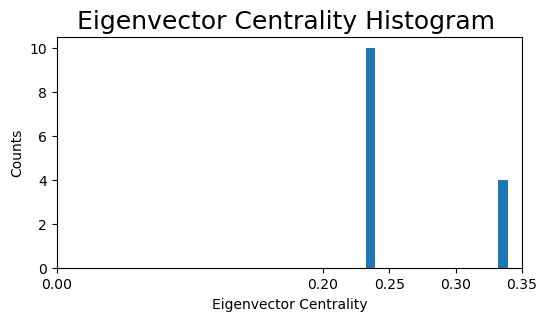

In [20]:
# plot
plt.figure(figsize=(6, 3))
plt.hist(eigenvector_centrality.values(), bins=15)
plt.xticks(ticks=[0, 0.20, 0.25, 0.3, 0.35])  # set the x axis ticks
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 18}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 10})
plt.ylabel("Counts", fontdict={"size": 10})

The distribution histogram shows the majority of eigenvector centralities are below **0.25**.

We can visualize the eigenvector centralities of nodes based on their size in the following representation:

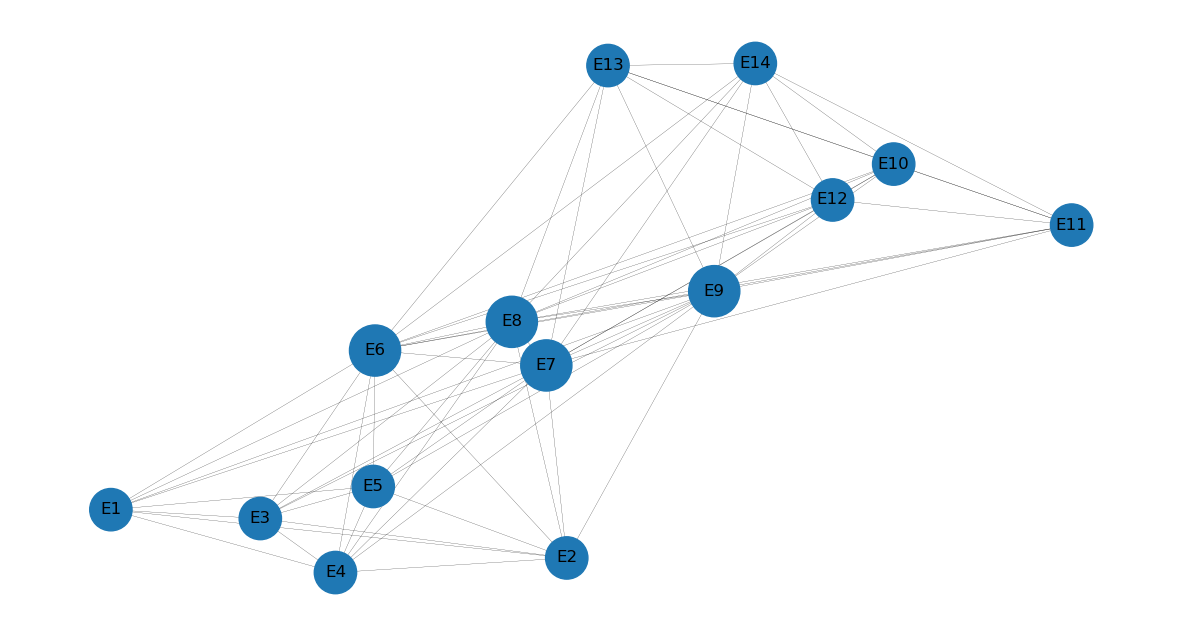

In [35]:
node_size = [
    v * 4000 for v in eigenvector_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(C, pos=pos, node_size=node_size, with_labels=True, width=0.15)
plt.axis("off")

# saving the networkx graph in gexf format
nx.write_gexf(C, 'C:/Users/andre/davis3.gexf')

We will visualize the eigenvector centralities of nodes size using *Gephi*: 

In [56]:
# Gephi Graph Layout

Image(url = "https://raw.githubusercontent.com/candrewxs/D620/main/Assignment%20Data%20Sets/DavisCsvg.svg", width = 500)

This *Gephi* visualization shows the clubs that host the most events with a node that is the larger than the others and has an light green color. The clubs which host the minimum number of events are smaller and have a dark geen and yellow colors.

### Summary

* In this network, what does it mean for a woman to be friends with another? They had to have attended at least one of the same events.
* While all of the women were well-connected to one another, there were 7 who were friends with everyone.
    * Evelyn, Theresa, Ruth, Verne, Sylvia, Nora, Helen
* In the network, the woman with the fewest friends was Charlotte (11).
* Some events were more popular than others.
    * Events: 6, 7, 8, 9